In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [ ]:
stopwords.words('english')

In [ ]:
df = pd.read_csv('lis.csv')

In [ ]:
df.head()

,දෙවැනි තරගයේ ජය ඉන්දියාවට,1
0,දකුණු අප්‍රිකා - ඉන්දියා දෙවන තරගය අද,1
1,මල්ෂා ෂෙහානි වාර්තාවක් සමගින් ශ්‍රී ලංකාවට ජය ...,1
2,ශ්‍රී ලංකා කාන්තා පිල මැලේසියාව පරදයි,1
3,සමස්ත ලංකා පාසල් ක්‍රීඩා තරග යළිත්,1
4,ශ්‍රී ලංකා කාන්තා ක්‍රිකට් කණ්ඩායම තායිලන්තය ප...,1


In [ ]:
data=df.dropna()

In [ ]:
data.shape

(32369, 2)

In [ ]:
data.dtypes

දෙවැනි තරගයේ ජය ඉන්දියාවට    object
1                             int64
dtype: object

In [ ]:
lData=data.columns =['News', 'Label'] # add labels

In [ ]:
data.head()

,News,Label
0,දකුණු අප්‍රිකා - ඉන්දියා දෙවන තරගය අද,1
1,මල්ෂා ෂෙහානි වාර්තාවක් සමගින් ශ්‍රී ලංකාවට ජය ...,1
2,ශ්‍රී ලංකා කාන්තා පිල මැලේසියාව පරදයි,1
3,සමස්ත ලංකා පාසල් ක්‍රීඩා තරග යළිත්,1
4,ශ්‍රී ලංකා කාන්තා ක්‍රිකට් කණ්ඩායම තායිලන්තය ප...,1


In [ ]:
data.Label.value_counts()

3    12450
2     9960
1     9959
Name: Label, dtype: int64

In [ ]:
def example_news(index):
    example = data[data.index == index][['News', 'Label']].values[0]
    if len(example) > 0:
        print(example[0])
        print()
        print('Category:', example[1])

In [ ]:
example_news(20000)

රජයට අයත් සියලු ආයතන ලේඛණයක් පාර්ලිමේන්තුවට

Category: 3


In [ ]:

with open('stopwords.txt', 'r') as f:
    sinhala_stopwords = [line.strip() for line in f]

In [ ]:
#data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(sinhala_stopwords)

def clean_text(text):
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    #text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('\\', '')
    text = text.replace('-', '')
    text = text.replace('\'', '')
    
    text = ''.join([i for i in text if not i.isdigit()])
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

data['News'] = data['News'].apply(clean_text)

In [ ]:
data['News'].replace('', np.nan, inplace=True)


In [ ]:
data.dropna(subset=['News'], inplace=True)

In [ ]:
data[30000:30020]

,News,Label
30066,පිටකොටුවේ වෙඩි තැබීමෙන් මිය ගිය තරුණයාගේ ඥාතීන...,3
30067,තීරණ ගත යුත්තේ ජනතා අවශ්‍යතාවයන්ට අනුවයි විපක්...,3
30068,ජාතික ළමාරක්ෂක අධිකාරියෙන් ඉල්ලීමක්,3
30069,දින කට පසු ගෘහස්ථ ගෑස් සැපයීම අද,3
30070,ප්‍රදේශ රැසකට අද තද වැසි,3
30071,පුංචි අයීෂා අවසන් ගමන් යයි,3
30072,සමාජ මාධ්‍ය ක්‍රියාකාරී රැට්ටාට ඇප හිමි වෙයි,3
30073,බොරිස් ජොන්සන් කළ සාකච්ඡාව අගමැතිගෙන් දැනුම් ද...,3
30074,බොරලැස්ගමුව නගර සභා සභාපති අත් අඩංගුවට,3
30075,වනිඳු අයි.පී.එල් සිහින කණ්ඩායමට,3


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['News'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 26387 unique tokens.


dict

In [ ]:
X = tokenizer.texts_to_sequences(data['News'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (32295, 250)


In [ ]:
X

array([[    0,     0,     0, ...,    41,    69,     3],
       [    0,     0,     0, ...,    21,    15,  3116],
       [    0,     0,     0, ...,   262,  1930,   836],
       ...,
       [    0,     0,     0, ..., 12687,  1120,  3378],
       [    0,     0,     0, ...,    66,     4,     1],
       [    0,     0,     0, ...,  1092,  8798,     1]], dtype=int32)

In [ ]:
Y = pd.get_dummies(data['Label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (32295, 3)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(29065, 250) (29065, 3)
(3230, 250) (3230, 3)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 5,080,703
Trainable params: 5,080,703
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
409/409 [==============================] - 321s 774ms/step - loss: 0.5042 - accuracy: 0.8008 - val_loss: 0.2929 - val_accuracy: 0.8944
Epoch 2/5
409/409 [==============================] - 315s 770ms/step - loss: 0.2032 - accuracy: 0.9308 - val_loss: 0.2792 - val_accuracy: 0.8958
Epoch 3/5
409/409 [==============================] - 313s 764ms/step - loss: 0.1219 - accuracy: 0.9609 - val_loss: 0.3083 - val_accuracy: 0.8916
Epoch 4/5
409/409 [==============================] - 314s 767ms/step - loss: 0.0846 - accuracy: 0.9732 - val_loss: 0.3732 - val_accuracy: 0.8858
Epoch 5/5
409/409 [==============================] - 317s 774ms/step - loss: 0.0650 - accuracy: 0.9788 - val_loss: 0.3930 - val_accuracy: 0.8882


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

101/101 [==============================] - 8s 81ms/step - loss: 0.4290 - accuracy: 0.8811
Test set
  Loss: 0.429
  Accuracy: 0.881


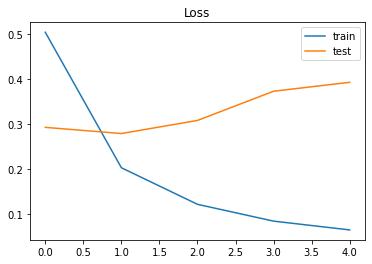

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

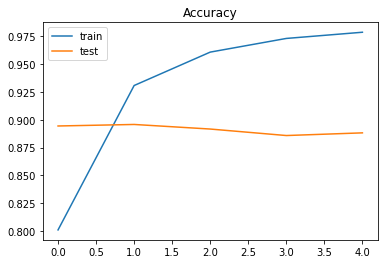

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ['දිලන්ත මාලගමුව ඊයේ තිබ්බ රේස් එකෙන් දිනලා']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ["sport", "internatipnal", "local"]
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 51ms/step
[[9.914442e-01 5.229725e-04 8.032908e-03]] sport
